In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#warnings
import warnings
warnings.filterwarnings('ignore')

#***Load Dataset:-***

In [5]:
#load dataset
df=pd.read_csv('/content/video games sales.csv')

In [19]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [7]:
#shape of dataset
df.shape

(16598, 11)

#***EDA(Explotary Data Analysis):-***

In [18]:
#information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  int64  
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [9]:
#dataset descibe
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [15]:
#dataset null values check
df.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [14]:
#Drop the null values in the dataset
df.dropna(inplace=True)

In [11]:
#check the duplicated
df.duplicated().sum()

np.int64(0)

In [12]:
#drop the duplicated column
df.drop_duplicates(inplace=True)

In [16]:
#check the shape of dataset
df.shape

(16291, 11)

In [17]:
#convert the year column in to int
df['Year']=df['Year'].astype(int)

In [20]:
df.dtypes

,0
Rank,int64
Name,object
Platform,object
Year,int64
Genre,object
Publisher,object
NA_Sales,float64
EU_Sales,float64
JP_Sales,float64
Other_Sales,float64


In [21]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

#***Data Visualization:-***

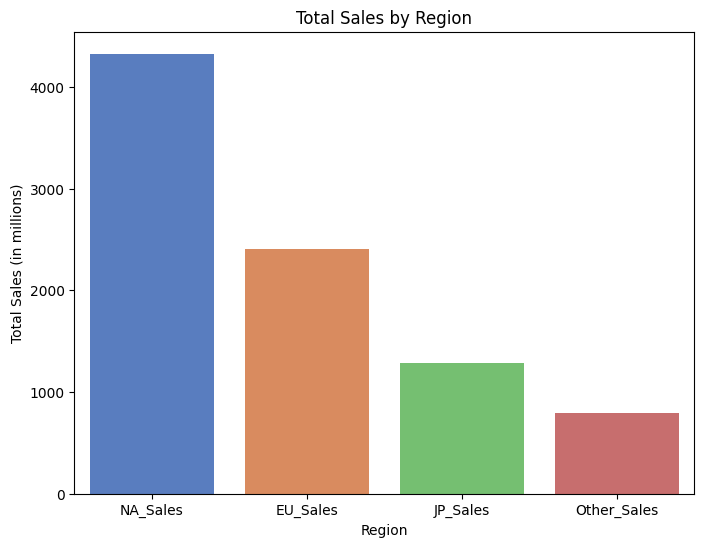

In [22]:
# Sales by Region (North America, Europe, Japan, Other)
region_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
plt.figure(figsize=(8, 6))
sns.barplot(x=region_sales.index, y=region_sales.values, palette='muted')
plt.title('Total Sales by Region')
plt.ylabel('Total Sales (in millions)')
plt.xlabel('Region')
plt.show()

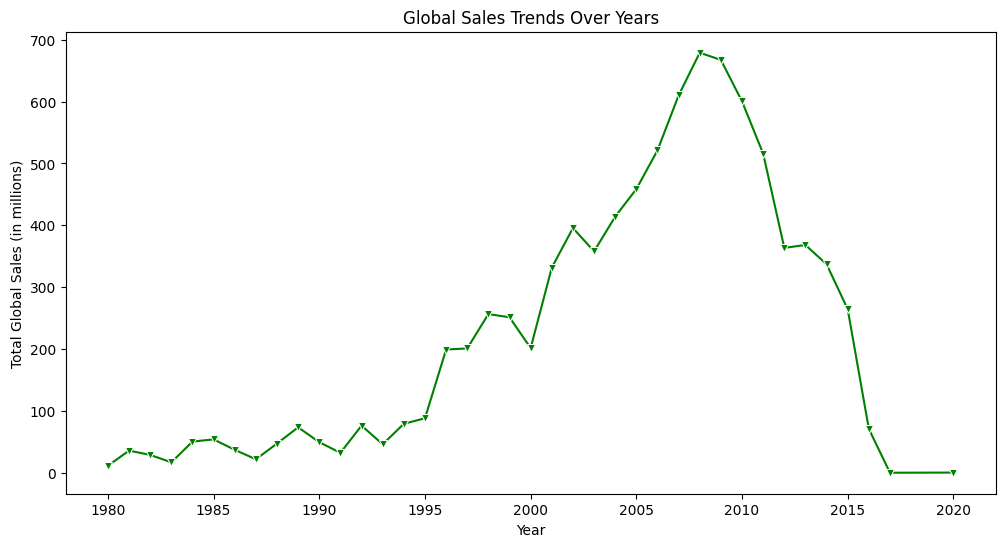

In [25]:
# Sales Trends Over Years (Global Sales)
plt.figure(figsize=(12, 6))
yearly_sales = df.groupby('Year')['Global_Sales'].sum()
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values, marker='v', color='green')
plt.title('Global Sales Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Total Global Sales (in millions)')
plt.show()

In [28]:
# Top 10 Games by Global Sales
top_games = df[['Name', 'Global_Sales']].sort_values('Global_Sales', ascending=False).head(10)
top_games

,Name,Global_Sales
0,Wii Sports,82.74
1,Super Mario Bros.,40.24
2,Mario Kart Wii,35.82
3,Wii Sports Resort,33.00
4,Pokemon Red/Pokemon Blue,31.37
5,Tetris,30.26
6,New Super Mario Bros.,30.01
7,Wii Play,29.02
8,New Super Mario Bros. Wii,28.62
9,Duck Hunt,28.31


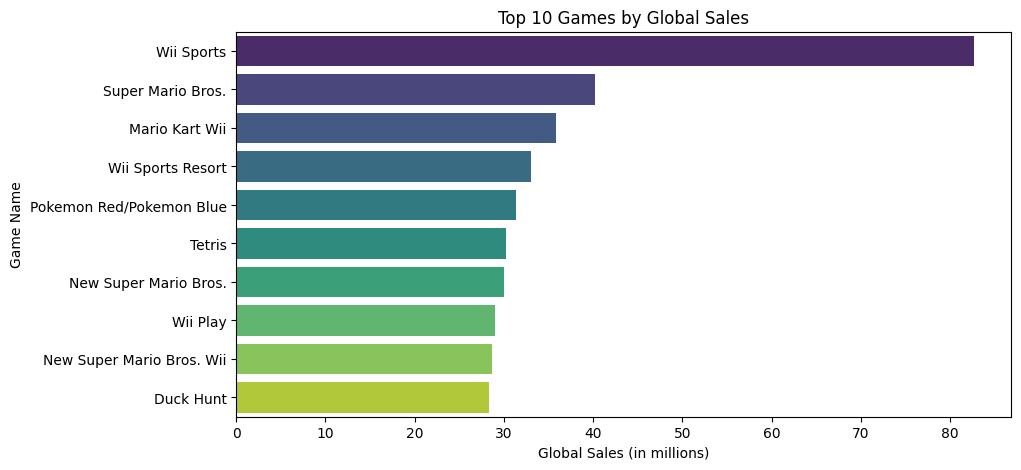

In [30]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Global_Sales', y='Name', data=top_games, palette='viridis')
plt.title('Top 10 Games by Global Sales')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Game Name')
plt.show()

In [32]:
#top 10 publiser as per global sale
top_publiser=df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)
top_publiser

,Global_Sales
Publisher,
Nintendo,1784.43
Electronic Arts,1093.39
Activision,721.41
Sony Computer Entertainment,607.28
Ubisoft,473.54
Take-Two Interactive,399.30
THQ,340.44
Konami Digital Entertainment,278.56
Sega,270.70


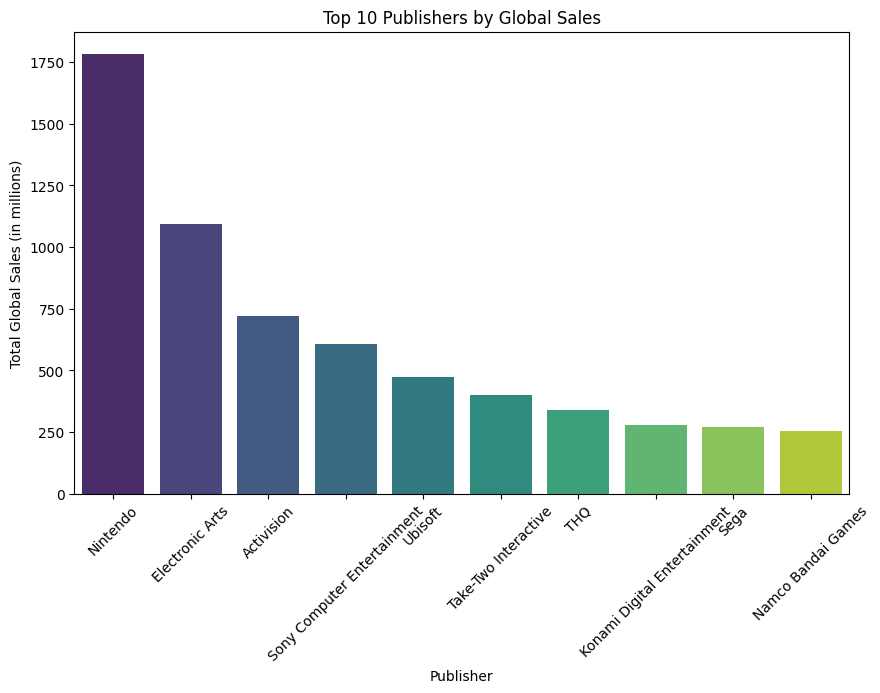

In [33]:
#barchart of top publiser
plt.figure(figsize=(10, 6))
sns.barplot(x=top_publiser.index, y=top_publiser.values, palette='viridis')
plt.title('Top 10 Publishers by Global Sales')
plt.xlabel('Publisher')
plt.ylabel('Total Global Sales (in millions)')
plt.xticks(rotation=45)
plt.show()

In [35]:
#top genre as per global sale
top_genre=df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).head(10)
top_genre

,Global_Sales
Genre,
Action,1722.84
Sports,1309.24
Shooter,1026.20
Role-Playing,923.83
Platform,829.13
Misc,789.87
Racing,726.76
Fighting,444.05
Simulation,389.98


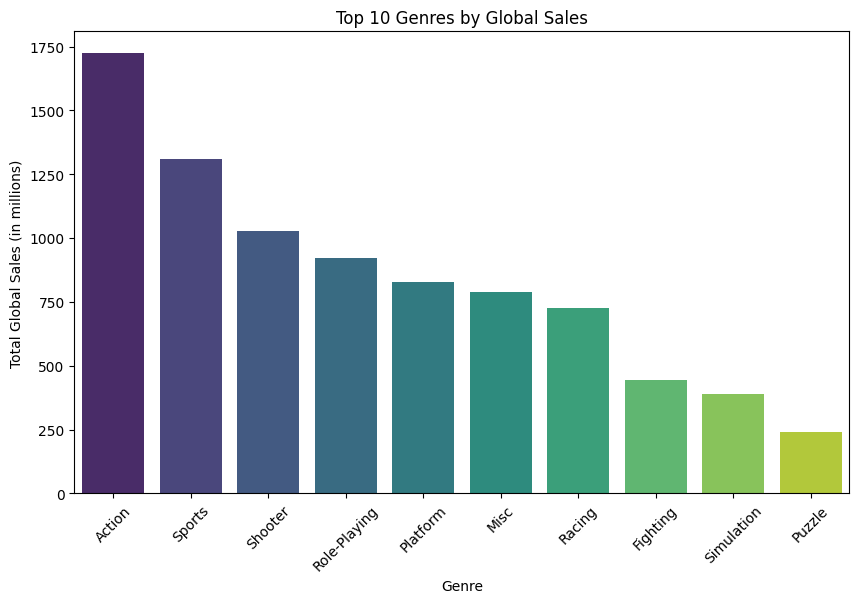

In [36]:
#barchart of top genre
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genre.index, y=top_genre.values, palette='viridis')
plt.title('Top 10 Genres by Global Sales')
plt.xlabel('Genre')
plt.ylabel('Total Global Sales (in millions)')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 0, 'Year')

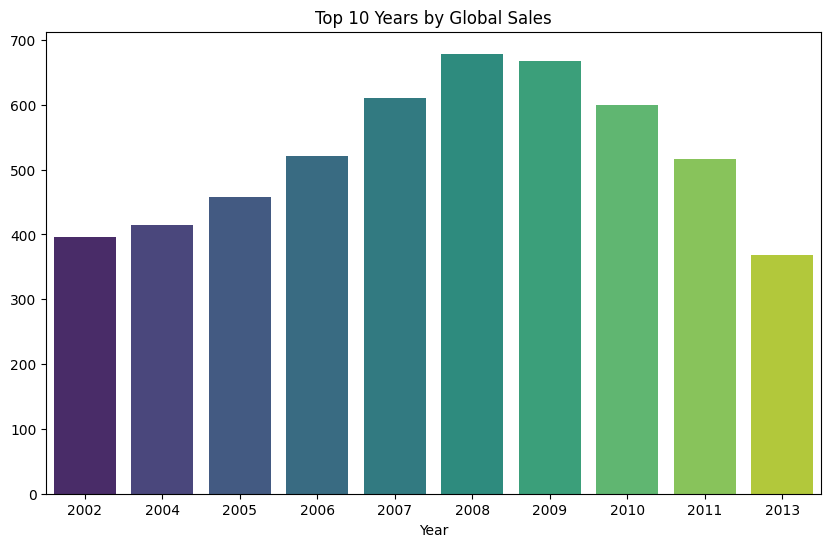

In [37]:
#top year as per global sale
top_year=df.groupby('Year')['Global_Sales'].sum().sort_values(ascending=False).head(10)
#barchart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_year.index, y=top_year.values, palette='viridis')
plt.title('Top 10 Years by Global Sales')
plt.xlabel('Year')